In [1]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
model_sn = os.path.join("C:\\", "Users", "qihao96", "Desktop", "model_sn.npy")

In [21]:
print(model_sn)

C:\Users\qihao96\Desktop\model_sn.npy


In [22]:
depth_file = np.load(model_sn)

In [24]:
depth_file.shape

(697, 128, 416)

In [52]:
len(depth_file)

697

In [26]:
sig_depth = depth_file[0]
sig_depth.shape

(128, 416)

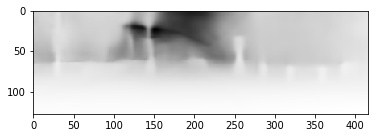

In [73]:
 plt.imshow(depth_file[321], cmap='binary')

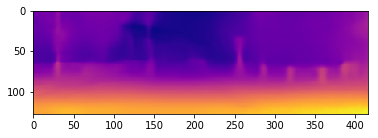

In [76]:
 plt.imshow(1.0/depth_file[321], cmap='plasma')

In [123]:
delta = os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240007.86-1.npy")

In [124]:
depth_file = np.load(delta)

In [125]:
sig_delta_1 = depth_file[0,:,:,0:3]

In [126]:
sig_delta_1.shape

(128, 416, 3)

In [127]:
np.min(sig_delta_1)

-10.998983

In [128]:
np.max(sig_delta_1)

5.84997

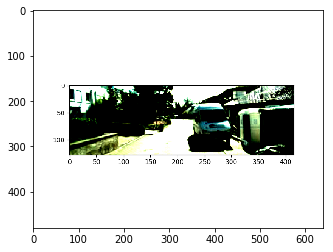

In [139]:
import matplotlib.image as mpimg
rgb_img = mpimg.imread(os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240007.86-1.png"))
plt.imshow(rgb_img)

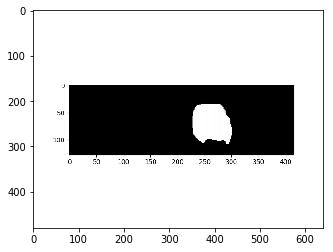

In [145]:
rgb_img = mpimg.imread(os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240007.86-1-sem.png"))
plt.imshow(rgb_img)

In [129]:
norm_1 = mpl.colors.Normalize(vmin = np.min(sig_delta_1), vmax = np.max(sig_delta_1), clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


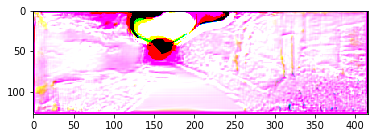

In [134]:
plt.imshow(sig_delta_1*20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


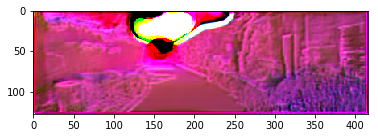

In [136]:
plt.imshow(sig_delta_1*5)

In [50]:
delta_dir = os.path.join("C:\\", "Users", "qihao96", "Desktop", "delta")

In [51]:
delta_files = os.listdir(delta_dir)

In [52]:
len(delta_files)

107

In [53]:
delta_files[0]

'1593240005.61.npy'

In [55]:
import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt

no display found. Using non-interactive Agg backend


In [56]:
vis_delta_dir =  os.path.join("C:\\", "Users", "qihao96", "Desktop", "delta_vis")

In [ ]:
sig_delta_1 = depth_file[0,:,:,0:3]*255

In [95]:
delta_files[60]

'1593240032.74.npy'

In [109]:
img = np.load(os.path.join(delta_dir, delta_files[60]))[1,:,:,6:9]

In [110]:
np.min(img)

-3.371376

In [111]:
np.max(img)

16.869305

In [116]:
np.max(img*5)

84.34653

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


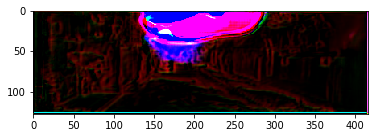

In [140]:
plt.imshow(img*5)

In [121]:
norm_1 = mpl.colors.Normalize(vmin = np.min(img), vmax = np.max(img), clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


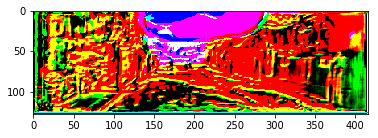

In [122]:
plt.imshow(img*255, norm=norm_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


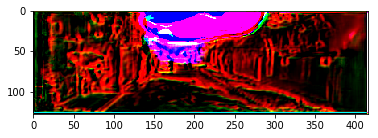

In [142]:
plt.imshow(img*20)

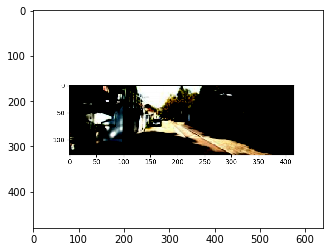

In [143]:
rgb_img = mpimg.imread(os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240032.74-1.png"))
plt.imshow(rgb_img)

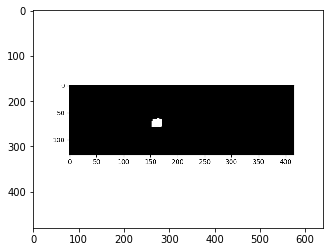

In [147]:
rgb_img = mpimg.imread(os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240032.74-1-sem.png"))
plt.imshow(rgb_img)

In [1]:
# vis test intermediate vars

In [3]:
base_path = "/userhome/34/h3567721/projects/Depth/GeoNet/predictions/test_depth_geo_delta_two_stage_mask_tmp"

In [23]:
bwd_rigid_error_path = os.path.join(base_path, "bwd_rigid_error", "1593519936.16.npy")

In [24]:
bwd_rigid_error = np.load(bwd_rigid_error_path)

In [25]:
bwd_rigid_error.shape

(8, 128, 416, 3)

In [26]:
np.min(bwd_rigid_error[0])

0.077781275

In [27]:
np.max(bwd_rigid_error[0])

0.71568537

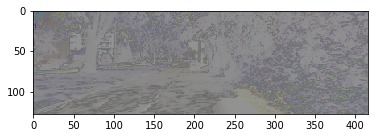

In [28]:
plt.imshow(bwd_rigid_error[0])

In [17]:
fwd_rigid_warp_path = os.path.join(base_path, "fwd_rigid_warp", "1593519936.16.npy")

In [18]:
fwd_rigid_warp = np.load(fwd_rigid_warp_path)

In [19]:
fwd_rigid_warp.shape

(8, 128, 416, 3)

In [20]:
fwd_rigid_warp[0].shape

(128, 416, 3)

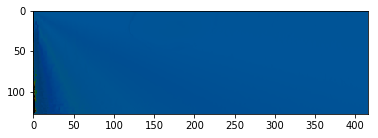

In [22]:
plt.imshow(fwd_rigid_warp[0])

In [16]:
fwd_rigid_warp[0]

array([[[-9.0124273e-01, -8.7084091e-01, -8.8613105e-01],
        [-9.0128601e-01, -8.7055725e-01, -8.8663602e-01],
        [-8.9704311e-01, -8.7125766e-01, -8.8672072e-01],
        ...,
        [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[-8.8575923e-01, -8.7612951e-01, -9.0135562e-01],
        [-8.6691260e-01, -8.6590040e-01, -8.9721310e-01],
        [-8.8825965e-01, -8.7019944e-01, -8.9322889e-01],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[-8.9789551e-01, -8.7189317e-01, -8.8639551e-01],
        [-9.0415788e-01, -8.6873806e-01, -8.8988417e-01],
        [-8.7522298e-01, -8.7345052e-01, -8.8647008e-01],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0

In [28]:
np.min(fwd_rigid_warp[0])

-0.8813319

In [29]:
np.max(fwd_rigid_warp[0])

1.0000001

In [22]:
bwd_rigid_warp_path = os.path.join(base_path, "model-70000-bwd_rigid_warp.npy")

In [127]:
bwd_rigid_warp = np.load(bwd_rigid_warp_path)

In [128]:
bwd_rigid_warp.shape

(697, 128, 416, 3)

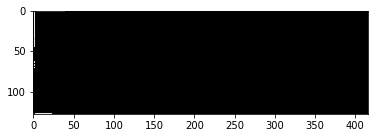

In [174]:
plt.imshow(-bwd_rigid_warp[123])

In [53]:
np.min(bwd_rigid_warp[123])

-0.95767397

In [54]:
np.max(bwd_rigid_warp[123])

3.8146973e-06

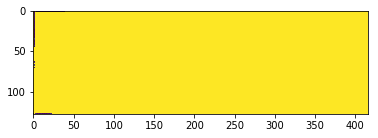

In [50]:
plt.imshow(bwd_rigid_warp[123][:,:,0])

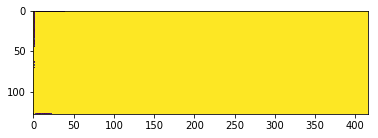

In [51]:
plt.imshow(bwd_rigid_warp[123][:,:,1])

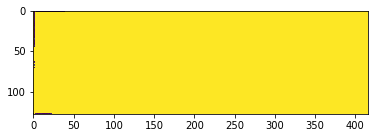

In [52]:
plt.imshow(bwd_rigid_warp[123][:,:,2])

In [23]:
src_image_stack_path = os.path.join(base_path, "model-70000-src_image_stack.npy")
src_image_stack = np.load(src_image_stack_path)

In [24]:
src_image_stack.shape

(697, 128, 416, 6)

In [25]:
np.min(src_image_stack[0][:,:,0:3])

-1.0

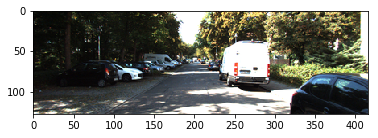

In [26]:
plt.imshow((src_image_stack[123][:,:,0:3]+1)/2.0)

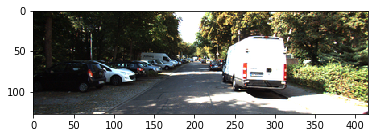

In [42]:
plt.imshow((src_image_stack[123][:,:,3:6]+1)/2.0)

In [46]:
tgt_image_path = os.path.join(base_path, "model-70000-tgt_image.npy")
tgt_image = np.load(tgt_image_path)

In [47]:
tgt_image.shape

(697, 128, 416, 3)

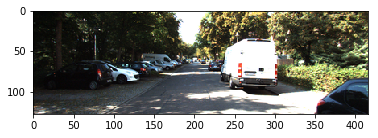

In [48]:
plt.imshow((tgt_image[123]+1)/2.0)

In [63]:
delta_xyz_path = os.path.join(base_path, "model-70000-delta_xyz.npy")
delta_xyz = np.load(delta_xyz_path)
# without mask

In [56]:
delta_xyz.shape

(697, 128, 416, 12)

In [61]:
np.min(delta_xyz[123][:,:,0:3])

-2.6253002

In [62]:
np.max(delta_xyz[123][:,:,0:3])

7.3759274

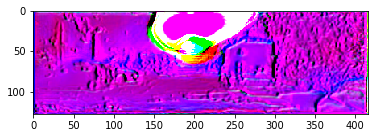

In [142]:
plt.imshow(delta_xyz[123][:,:,0:3]*10)

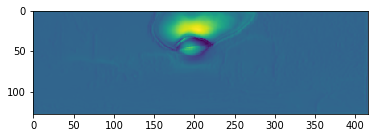

In [161]:
plt.imshow(delta_xyz[123][:,:,2])

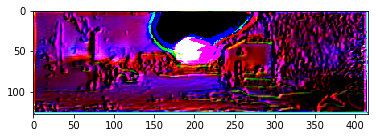

In [144]:
plt.imshow(delta_xyz[123][:,:,3:6]*15)

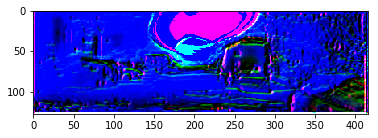

In [146]:
plt.imshow(delta_xyz[123][:,:,6:9]*15)

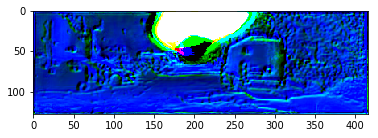

In [147]:
plt.imshow(delta_xyz[123][:,:,9:12]*10)

# Vis training

In [75]:
base_path = "/userhome/34/h3567721/projects/Depth/GeoNet-ori/log/first_stage_vis"

In [94]:
tgt_image = np.load(os.path.join(base_path, "tgt_image","1593528372.16.npy"))

In [95]:
tgt_image.shape

(4, 128, 416, 3)

In [96]:
tgt_image[0].shape

(128, 416, 3)

In [97]:
np.min(tgt_image[0])

-0.8901961

In [98]:
np.max(tgt_image[0])

1.0

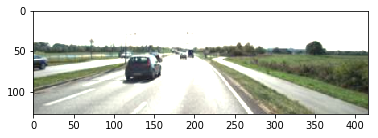

In [99]:
plt.imshow((tgt_image[0]+1)/2)

In [76]:
src_image_stack = np.load(os.path.join(base_path, "src_image_stack","1593528372.16.npy"))

In [77]:
src_image_stack.shape

(4, 128, 416, 6)

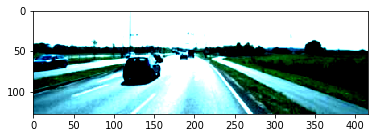

In [100]:
plt.imshow(src_image_stack[0][:,:,0:3])

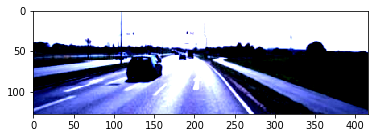

In [101]:
plt.imshow(src_image_stack[0][:,:,3:6])

In [85]:
depth = np.load(os.path.join(base_path, "depth","1593528361.14.npy"))

In [87]:
depth.shape

(12, 128, 416, 1)

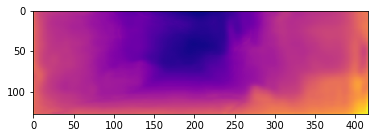

In [102]:
plt.imshow(1.0/depth[0][:,:,0], cmap="plasma")

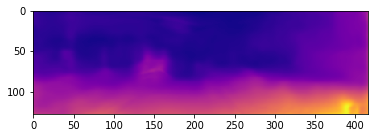

In [103]:
plt.imshow(1.0/depth[1][:,:,0], cmap="plasma")

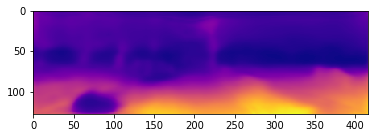

In [104]:
plt.imshow(1.0/depth[2][:,:,0], cmap="plasma")

In [112]:
fwd_rigid_warp = np.load(os.path.join(base_path, "fwd_rigid_error","1593528361.14.npy"))

In [113]:
fwd_rigid_warp.shape

(8, 128, 416, 3)

In [114]:
np.min(fwd_rigid_warp[4])

0.0

In [115]:
np.max(fwd_rigid_warp[4])

0.9576228

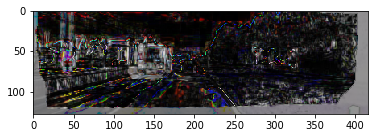

In [117]:
plt.imshow(fwd_rigid_warp[5])

0


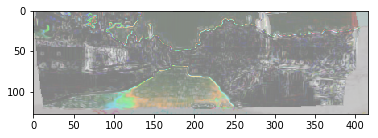

1


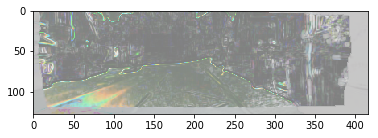

2


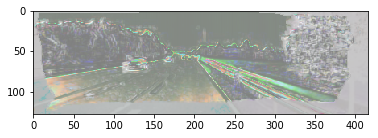

3


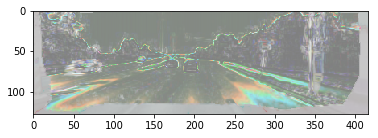

4


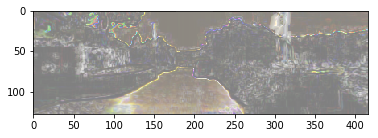

5


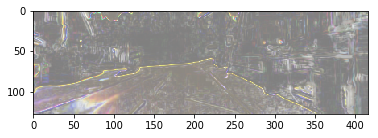

6


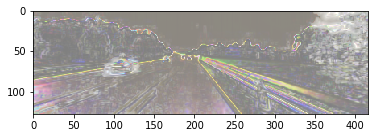

7


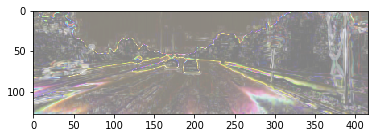

In [48]:
for i in range(8):
    print(i)
    plt.imshow((bwd_rigid_warp[i]+1)/2)
    plt.show()

In [14]:
np.min(bwd_rigid_warp[3])

0.0

In [15]:
np.max(bwd_rigid_warp[3])

0.95312834

In [43]:
bwd_rigid_error = np.load(os.path.join(base_path, "bwd_rigid_error","1593528340.01.npy"))

In [44]:
bwd_rigid_error.shape

(8, 128, 416, 3)

In [45]:
np.min(bwd_rigid_error)

0.0

In [46]:
np.max(bwd_rigid_error)

1.0624726

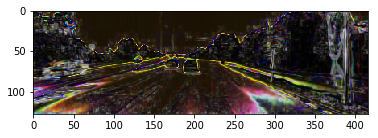

In [47]:
plt.imshow(bwd_rigid_error[7])

In [21]:
depth = np.load(os.path.join(base_path, "depth","1593526696.74.npy"))

In [22]:
depth.shape

(12, 128, 416, 1)

In [23]:
depth[0].shape

(128, 416, 1)

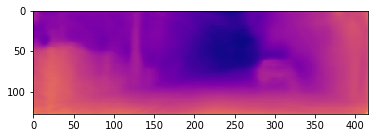

In [24]:
plt.imshow(1.0/depth[11][:,:,0],cmap="plasma")

In [26]:
bwd_rigid_flow = np.load(os.path.join(base_path, "bwd_rigid_flow","1593526696.74.npy"))

In [27]:
bwd_rigid_flow.shape

(8, 128, 416, 2)

In [28]:
def make_color_wheel():
    """
    Generate color wheel according Middlebury color code
    :return: Color wheel
    """
    RY = 15
    YG = 6
    GC = 4
    CB = 11
    BM = 13
    MR = 6

    ncols = RY + YG + GC + CB + BM + MR

    colorwheel = np.zeros([ncols, 3])

    col = 0

    # RY
    colorwheel[0:RY, 0] = 255
    colorwheel[0:RY, 1] = np.transpose(np.floor(255*np.arange(0, RY) / RY))
    col += RY

    # YG
    colorwheel[col:col+YG, 0] = 255 - np.transpose(np.floor(255*np.arange(0, YG) / YG))
    colorwheel[col:col+YG, 1] = 255
    col += YG

    # GC
    colorwheel[col:col+GC, 1] = 255
    colorwheel[col:col+GC, 2] = np.transpose(np.floor(255*np.arange(0, GC) / GC))
    col += GC

    # CB
    colorwheel[col:col+CB, 1] = 255 - np.transpose(np.floor(255*np.arange(0, CB) / CB))
    colorwheel[col:col+CB, 2] = 255
    col += CB

    # BM
    colorwheel[col:col+BM, 2] = 255
    colorwheel[col:col+BM, 0] = np.transpose(np.floor(255*np.arange(0, BM) / BM))
    col += + BM

    # MR
    colorwheel[col:col+MR, 2] = 255 - np.transpose(np.floor(255 * np.arange(0, MR) / MR))
    colorwheel[col:col+MR, 0] = 255

    return colorwheel

def compute_color(u, v):
    """
    compute optical flow color map
    :param u: optical flow horizontal map
    :param v: optical flow vertical map
    :return: optical flow in color code
    """
    [h, w] = u.shape
    img = np.zeros([h, w, 3])
    nanIdx = np.isnan(u) | np.isnan(v)
    u[nanIdx] = 0
    v[nanIdx] = 0

    colorwheel = make_color_wheel()
    ncols = np.size(colorwheel, 0)

    rad = np.sqrt(u**2+v**2)

    a = np.arctan2(-v, -u) / np.pi

    fk = (a+1) / 2 * (ncols - 1) + 1

    k0 = np.floor(fk).astype(int)

    k1 = k0 + 1
    k1[k1 == ncols+1] = 1
    f = fk - k0

    for i in range(0, np.size(colorwheel,1)):
        tmp = colorwheel[:, i]
        col0 = tmp[k0-1] / 255
        col1 = tmp[k1-1] / 255
        col = (1-f) * col0 + f * col1

        idx = rad <= 1
        col[idx] = 1-rad[idx]*(1-col[idx])
        notidx = np.logical_not(idx)

        col[notidx] *= 0.75
        img[:, :, i] = np.uint8(np.floor(255 * col*(1-nanIdx)))

    return img

def flow_to_image(flow):
    """
    Convert flow into middlebury color code image
    :param flow: optical flow map
    :return: optical flow image in middlebury color
    """
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    maxu = -999.
    maxv = -999.
    minu = 999.
    minv = 999.
    UNKNOWN_FLOW_THRESH = 1e7
    SMALLFLOW = 0.0
    LARGEFLOW = 1e8

    idxUnknow = (abs(u) > UNKNOWN_FLOW_THRESH) | (abs(v) > UNKNOWN_FLOW_THRESH)
    u[idxUnknow] = 0
    v[idxUnknow] = 0

    maxu = max(maxu, np.max(u))
    minu = min(minu, np.min(u))

    maxv = max(maxv, np.max(v))
    minv = min(minv, np.min(v))

    rad = np.sqrt(u ** 2 + v ** 2)
    maxrad = max(-1, np.max(rad))

    u = u/(maxrad + np.finfo(float).eps)
    v = v/(maxrad + np.finfo(float).eps)

    img = compute_color(u, v)

    idx = np.repeat(idxUnknow[:, :, np.newaxis], 3, axis=2)
    img[idx] = 0

    return np.uint8(img)

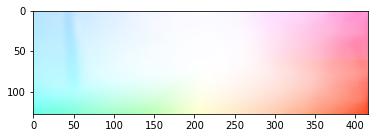

In [32]:
plt.imshow(flow_to_image(bwd_rigid_flow[0]))